In [1]:
from game import Game
import argparse
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
import playercontroller as pc
import agent as ag
import traincontroller as tc
import feature_extractors.extractor_helpers as exh
import gch
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Dense, Dropout
from config import all_features
from training import train_loop
import eval
import parse
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
players = 4
player_controllers = [pc.random_player_controller() for i in range(4)]
train_controller = None
features = all_features
game = Game(players, features, player_controllers, train_controller)

In [3]:
input_size = exh.get_input_size(features, players)
agents = eval.get_agents("models/train1", input_size, sample_period=2)
ratings = eval.calibrate_agent_elo(game, agents, eval_epochs=5000)

W0825 17:37:20.355960 139745316906816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 17:37:20.388461 139745316906816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 17:37:20.479910 139745316906816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0825 17:37:20.482270 139745316906816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0825 17:37:20.485857 139745316906816 depre

/root/sushigo/feature_extractors/strategy_helper_features.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ntemp = np.count_nonzero(cselected == 't')
/root/sushigo/feature_extractors/strategy_helper_features.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  nsashimi = np.count_nonzero(cselected == 's')


In [4]:
for i in range(len(ratings)):
    iter = int(parse.parse("benchmark_{}_iters.h5", ratings[i][0])[0])
    ratings[i] = (iter, ratings[i][1], ratings[i][2])

In [5]:
iters = []
mus = []
sigmas = []

ratings = sorted(ratings, key=lambda x: x[0])
for x in ratings:
    iters.append(x[0])
    mus.append(x[1])
    sigmas.append(x[2])

Text(0, 0.5, 'trueskill rating')

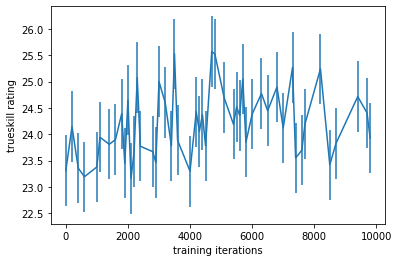

In [6]:
plt.errorbar(iters, mus, yerr=sigmas)
plt.xlabel("training iterations")
plt.ylabel("trueskill rating")

[0.670869628705149,
 0.6670495866099081,
 0.66810580141705,
 0.6684892236584149,
 0.6691372360489766,
 0.6665019280103895,
 0.6665684992606145,
 0.6732477134112413,
 0.6681109447739376,
 0.6694089189480074,
 0.6643432130533922,
 0.672897497482177,
 0.6716116716877065,
 0.6697435913071749,
 0.6699807367714201,
 0.6696030871313414,
 0.6714689395230256,
 0.6700211678637177,
 0.6713133115831303,
 0.6646804768041243,
 0.6663556811504,
 0.6687447021397434,
 0.6730064074053065,
 0.6667473043364704,
 0.6692762759569832,
 0.66940934092507,
 0.6661659435157612,
 0.6728415763687879,
 0.6735571032715876,
 0.6737384492649078,
 0.6680445899416547,
 0.6710373463923862,
 0.6713554765341435,
 0.6696113697160146,
 0.6673628574686808,
 0.6667407350895929,
 0.6686337279063737,
 0.669741536588282,
 0.6698676039743862,
 0.6728321848443465,
 0.6706810403601255,
 0.6696321809316438,
 0.6695811123145504,
 0.6661694562882079,
 0.6693008695427499,
 0.668177928957352,
 0.6685127322854197,
 0.6674367034257384,
 0.

In [9]:
print(np.mean(mus))

24.19319328676907


In [3]:
input_size = exh.get_input_size(features, players)
model = load_model("models/train1/benchmark_10000_iters.h5")
agent1 = ag.agent(model, input_size)
ratings = eval.calibrate_agent_elo(game, [agent1], eval_epochs=100)

W0825 18:20:48.666729 140058026059584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 18:20:48.701651 140058026059584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 18:20:48.799059 140058026059584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0825 18:20:48.802949 140058026059584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0825 18:20:48.806656 140058026059584 depre

/root/sushigo/feature_extractors/strategy_helper_features.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ntemp = np.count_nonzero(cselected == 't')
/root/sushigo/feature_extractors/strategy_helper_features.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  nsashimi = np.count_nonzero(cselected == 's')


AttributeError: 'random_player_controller' object has no attribute 'agent'

In [4]:
print(ratings)

NameError: name 'ratings' is not defined